In [ ]:
import pickle
import pandas as pd

# Google Drive 마운트
from google.colab import drive
drive.mount('/content/drive')

# 데이터 불러오기
LOAD_PATH = '/content/drive/MyDrive/preprocessed_data.pkl'

with open(LOAD_PATH, 'rb') as f:
    data = pickle.load(f)

# 변수로 꺼내기
X_train_clf = data['X_train_clf']
X_val_clf = data['X_val_clf']
X_test_clf = data['X_test_clf']
y_train_clf = data['y_train_clf']
y_val_clf = data['y_val_clf']
y_test_clf = data['y_test_clf']

X_train_reg = data['X_train_reg']
X_val_reg = data['X_val_reg']
X_test_reg = data['X_test_reg']
y_train_reg = data['y_train_reg']
y_val_reg = data['y_val_reg']
y_test_reg = data['y_test_reg']

print(f"✅ 데이터 로드 완료!")
print(f"Classification Train: {X_train_clf.shape}")
print(f"Regression Train: {X_train_reg.shape}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ 데이터 로드 완료!
Classification Train: (77366, 45)
Regression Train: (77366, 45)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 6.7 MB/s eta 0:00:00
피처 엔지니어링 후 피처 수: 58
선택된 피처 수: 40

1️⃣ LINEAR REGRESSION 개선

[Baseline] Linear Regression
Baseline Linear Regression
  Validation R²: 0.5167
  Test R²: 0.5161 | MAE: 8.1762 | RMSE: 10.3038

[Feature Engineering] Linear Regression
FE Linear Regression
  Validation R²: 0.5179
  Test R²: 0.5160 | MAE: 8.1766 | RMSE: 10.3045

[Feature Selection] Linear Regression
FS Linear Regression
  Validation R²: 0.5146
  Test R²: 0.5139 | MAE: 8.2039 | RMSE: 10.3264

[Optuna] Ridge Regression


  0%|          | 0/50 [00:00<?, ?it/s]

Ridge (alpha=99.1834)
  Validation R²: 0.5146
  Test R²: 0.5140 | MAE: 8.2041 | RMSE: 10.3262

[Optuna] Lasso Regression


  0%|          | 0/50 [00:00<?, ?it/s]

Lasso (alpha=0.0254)
  Validation R²: 0.5148
  Test R²: 0.5144 | MAE: 8.1991 | RMSE: 10.3216

[Optuna] ElasticNet Regression


  0%|          | 0/50 [00:00<?, ?it/s]

ElasticNet (alpha=0.0290, l1_ratio=0.9377)
  Validation R²: 0.5148
  Test R²: 0.5144 | MAE: 8.1994 | RMSE: 10.3216

[Polynomial] Polynomial(2) + Ridge
Polynomial 피처 수: 820


  0%|          | 0/50 [00:00<?, ?it/s]

Poly + Ridge (alpha=328.0021)
  Validation R²: 0.5579
  Test R²: 0.5546 | MAE: 7.8837 | RMSE: 9.8849

----------------------------------------------------------------------
📊 Linear Regression 개선 결과 요약
----------------------------------------------------------------------
                       val_r2  test_r2  test_mae  test_rmse
Baseline               0.5167   0.5161    8.1762    10.3038
Feature Engineering    0.5179   0.5160    8.1766    10.3045
Feature Selection      0.5146   0.5139    8.2039    10.3264
Ridge (Optuna)         0.5146   0.5140    8.2041    10.3262
Lasso (Optuna)         0.5148   0.5144    8.1991    10.3216
ElasticNet (Optuna)    0.5148   0.5144    8.1994    10.3216
Poly + Ridge (Optuna)  0.5579   0.5546    7.8837     9.8849

🏆 Best Linear Model: Poly + Ridge (Optuna) (Test R² = 0.5546)

2️⃣ RANDOM FOREST 개선

[Baseline] Random Forest
Baseline Random Forest
  Validation R²: 0.8247
  Test R²: 0.8282 | MAE: 4.9293 | RMSE: 6.1388

[Feature Engineering] Random Forest
FE Ra

  0%|          | 0/100 [00:00<?, ?it/s]


최적 Validation R²: 0.9729
최적 하이퍼파라미터:
  n_estimators: 274
  max_depth: 30
  min_samples_split: 6
  min_samples_leaf: 1
  max_features: sqrt
  bootstrap: False

Optuna Random Forest
  Validation R²: 0.9729
  Test R²: 0.9742 | MAE: 1.6755 | RMSE: 2.3777

----------------------------------------------------------------------
📊 Random Forest 개선 결과 요약
----------------------------------------------------------------------
                     val_r2  test_r2  test_mae  test_rmse
Baseline             0.8247   0.8282    4.9293     6.1388
Feature Engineering  0.8215   0.8235    4.9913     6.2220
Feature Selection    0.8133   0.8157    5.0861     6.3593
Optuna Tuning        0.9729   0.9742    1.6755     2.3777

🏆 Best RF Stage: Optuna Tuning (Test R² = 0.9742)

📊 전체 모델 최종 비교
                          val_r2  test_r2  test_mae  test_rmse  Rank
XGBoost (Optuna)          0.9769   0.9773    1.5212     2.2333     1
Random Forest (Best)      0.9729   0.9742    1.6755     2.3777     2
Linear Regression

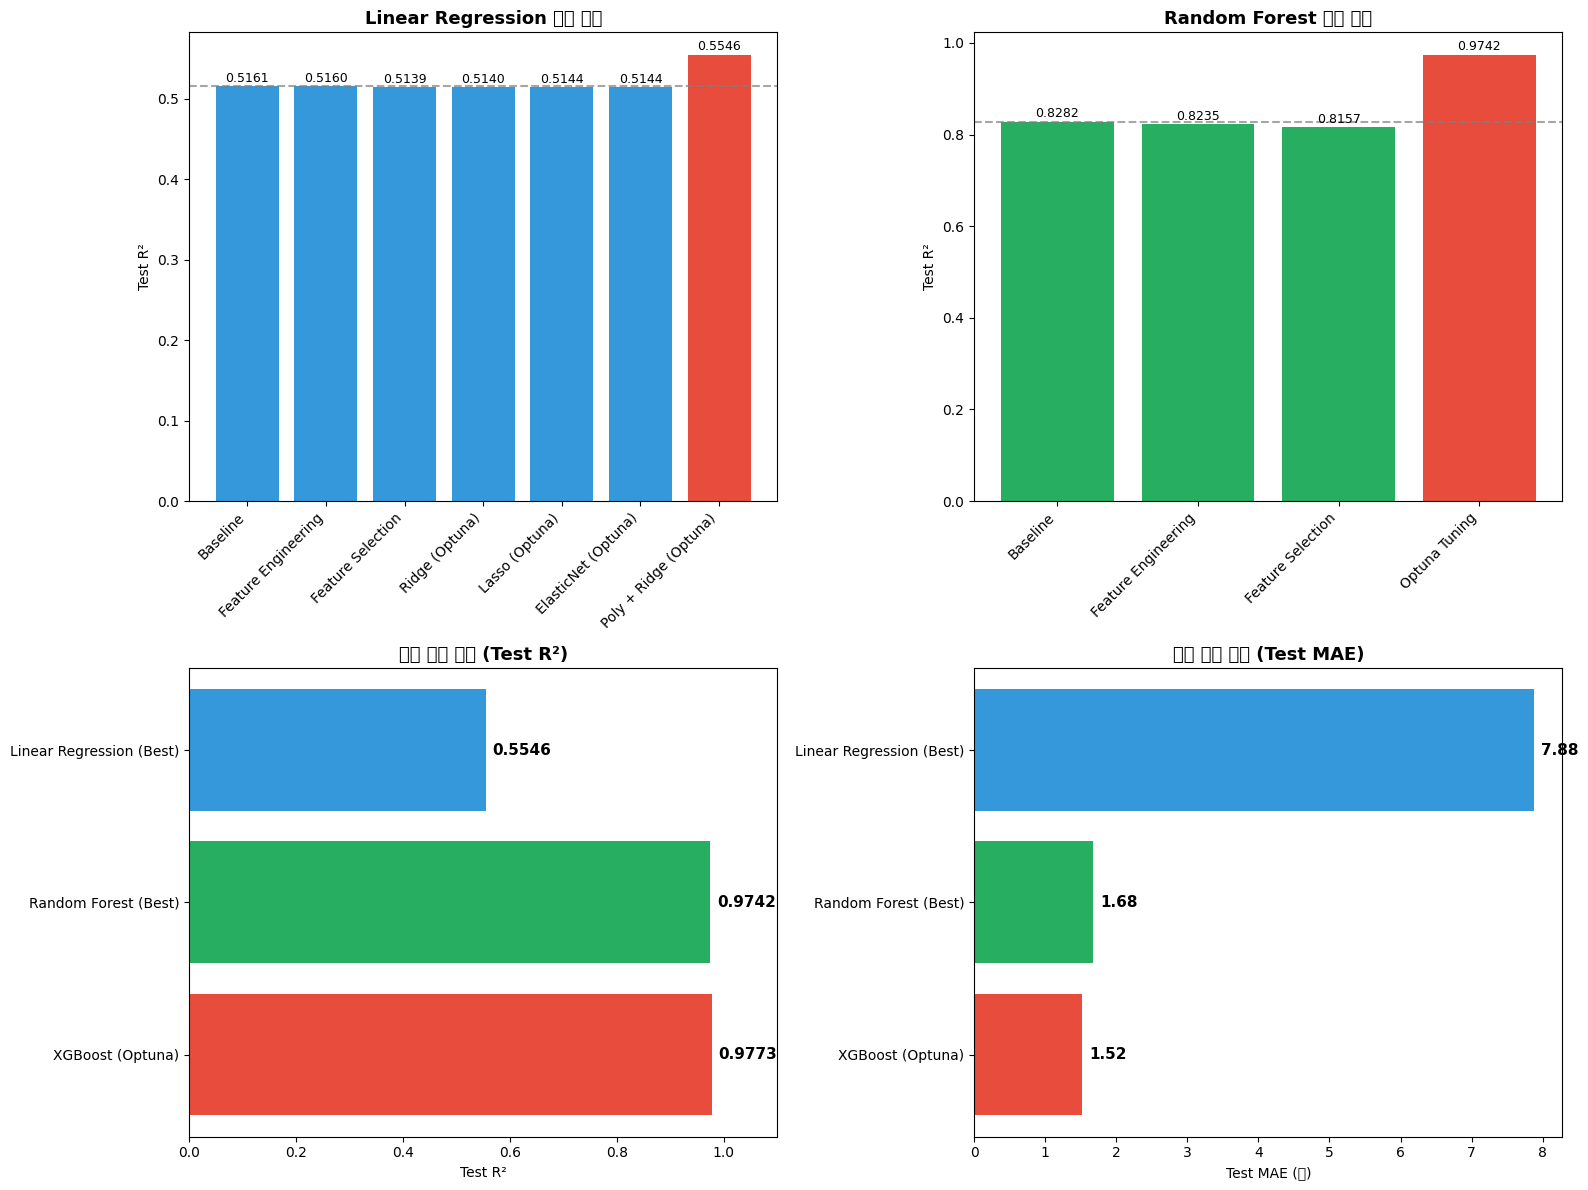


✅ 모든 모델 개선 완료!


In [ ]:
# ============================================
# 📦 라이브러리 임포트
# ============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

!pip install optuna -q

import optuna
from optuna.samplers import TPESampler

optuna.logging.set_verbosity(optuna.logging.WARNING)

# ============================================
# 🔧 공통 함수
# ============================================
def evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test, model_name="Model"):
    model.fit(X_train, y_train)

    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)

    val_r2 = r2_score(y_val, y_val_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    print(f"{model_name}")
    print(f"  Validation R²: {val_r2:.4f}")
    print(f"  Test R²: {test_r2:.4f} | MAE: {test_mae:.4f} | RMSE: {test_rmse:.4f}")

    return {'val_r2': val_r2, 'test_r2': test_r2, 'test_mae': test_mae, 'test_rmse': test_rmse}

# ============================================
# 📊 데이터 준비 (이전 코드에서 생성된 피처 사용)
# ============================================

# 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reg)
X_val_scaled = scaler.transform(X_val_reg)
X_test_scaled = scaler.transform(X_test_reg)

feature_names = X_train_reg.columns.tolist()
X_train_df = pd.DataFrame(X_train_scaled, columns=feature_names)
X_val_df = pd.DataFrame(X_val_scaled, columns=feature_names)
X_test_df = pd.DataFrame(X_test_scaled, columns=feature_names)

# ============================================
# 🔨 피처 엔지니어링 함수
# ============================================
def create_features(df, feature_names):
    """새로운 피처 생성"""
    df_new = df.copy()
    cols = feature_names

    # 비율 피처
    if 'outstanding_debt' in cols and 'monthly_inhand_salary' in cols:
        idx_debt = cols.index('outstanding_debt')
        idx_salary = cols.index('monthly_inhand_salary')
        df_new['debt_to_income'] = df.iloc[:, idx_debt] / (df.iloc[:, idx_salary] + 1e-8)

    if 'total_emi_per_month' in cols and 'monthly_inhand_salary' in cols:
        idx_emi = cols.index('total_emi_per_month')
        idx_salary = cols.index('monthly_inhand_salary')
        df_new['emi_to_income'] = df.iloc[:, idx_emi] / (df.iloc[:, idx_salary] + 1e-8)

    if 'amount_invested_monthly' in cols and 'monthly_inhand_salary' in cols:
        idx_invest = cols.index('amount_invested_monthly')
        idx_salary = cols.index('monthly_inhand_salary')
        df_new['invest_to_income'] = df.iloc[:, idx_invest] / (df.iloc[:, idx_salary] + 1e-8)

    if 'num_of_loan' in cols and 'num_credit_card' in cols:
        idx_loan = cols.index('num_of_loan')
        idx_card = cols.index('num_credit_card')
        df_new['loan_per_card'] = df.iloc[:, idx_loan] / (df.iloc[:, idx_card] + 1e-8)

    # 상호작용 피처
    if 'num_of_delayed_payment' in cols and 'interest_rate' in cols:
        idx_delay = cols.index('num_of_delayed_payment')
        idx_rate = cols.index('interest_rate')
        df_new['delay_interest_interaction'] = df.iloc[:, idx_delay] * df.iloc[:, idx_rate]

    if 'credit_utilization_ratio' in cols and 'outstanding_debt' in cols:
        idx_util = cols.index('credit_utilization_ratio')
        idx_debt = cols.index('outstanding_debt')
        df_new['util_debt_interaction'] = df.iloc[:, idx_util] * df.iloc[:, idx_debt]

    if 'age' in cols and 'credit_history_age' in cols:
        idx_age = cols.index('age')
        idx_history = cols.index('credit_history_age')
        df_new['age_history_interaction'] = df.iloc[:, idx_age] * df.iloc[:, idx_history]

    # 집계 피처
    if 'num_bank_accounts' in cols and 'num_credit_card' in cols:
        idx_bank = cols.index('num_bank_accounts')
        idx_card = cols.index('num_credit_card')
        df_new['total_accounts'] = df.iloc[:, idx_bank] + df.iloc[:, idx_card]

    if 'outstanding_debt' in cols and 'total_emi_per_month' in cols and 'num_of_loan' in cols:
        idx_debt = cols.index('outstanding_debt')
        idx_emi = cols.index('total_emi_per_month')
        idx_loan = cols.index('num_of_loan')
        df_new['financial_burden'] = df.iloc[:, idx_debt] + df.iloc[:, idx_emi] * 12 + df.iloc[:, idx_loan] * 100

    # 다항 피처
    if 'num_of_delayed_payment' in cols:
        idx_delay = cols.index('num_of_delayed_payment')
        df_new['delayed_payment_sq'] = df.iloc[:, idx_delay] ** 2

    if 'credit_utilization_ratio' in cols:
        idx_util = cols.index('credit_utilization_ratio')
        df_new['credit_util_sq'] = df.iloc[:, idx_util] ** 2

    # 로그 변환
    if 'annual_income' in cols:
        idx_income = cols.index('annual_income')
        df_new['log_annual_income'] = np.log1p(np.abs(df.iloc[:, idx_income]))

    if 'outstanding_debt' in cols:
        idx_debt = cols.index('outstanding_debt')
        df_new['log_outstanding_debt'] = np.log1p(np.abs(df.iloc[:, idx_debt]))

    return df_new

# 피처 생성
X_train_fe = create_features(X_train_df, feature_names)
X_val_fe = create_features(X_val_df, feature_names)
X_test_fe = create_features(X_test_df, feature_names)

print(f"피처 엔지니어링 후 피처 수: {X_train_fe.shape[1]}")

# ============================================
# 🎯 피처 셀렉션 (XGBoost 기반)
# ============================================
temp_xgb = XGBRegressor(n_estimators=100, max_depth=6, random_state=42, verbosity=0)
temp_xgb.fit(X_train_fe, y_train_reg)

importance_df = pd.DataFrame({
    'feature': X_train_fe.columns,
    'importance': temp_xgb.feature_importances_
}).sort_values('importance', ascending=False)

# 상관관계 높은 피처 제거
corr_matrix = X_train_fe.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_pairs = []
for col in upper_tri.columns:
    correlated = upper_tri.index[upper_tri[col] > 0.95].tolist()
    for corr_col in correlated:
        high_corr_pairs.append((col, corr_col, corr_matrix.loc[col, corr_col]))

features_to_drop = set()
for col1, col2, _ in high_corr_pairs:
    imp1 = importance_df[importance_df['feature'] == col1]['importance'].values
    imp2 = importance_df[importance_df['feature'] == col2]['importance'].values
    imp1 = imp1[0] if len(imp1) > 0 else 0
    imp2 = imp2[0] if len(imp2) > 0 else 0
    if imp1 < imp2:
        features_to_drop.add(col1)
    else:
        features_to_drop.add(col2)

remaining_features = [f for f in importance_df['feature'] if f not in features_to_drop]
selected_features = remaining_features[:40]

X_train_selected = X_train_fe[selected_features]
X_val_selected = X_val_fe[selected_features]
X_test_selected = X_test_fe[selected_features]

print(f"선택된 피처 수: {len(selected_features)}")

# 결과 저장
all_results = {}

# ============================================
# 1️⃣ LINEAR REGRESSION 개선
# ============================================
print("\n" + "=" * 70)
print("1️⃣ LINEAR REGRESSION 개선")
print("=" * 70)

lr_results = {}

# --- Baseline ---
print("\n[Baseline] Linear Regression")
lr_baseline = LinearRegression()
lr_results['Baseline'] = evaluate_model(
    lr_baseline, X_train_df, y_train_reg,
    X_val_df, y_val_reg, X_test_df, y_test_reg,
    "Baseline Linear Regression"
)

# --- Feature Engineering ---
print("\n[Feature Engineering] Linear Regression")
lr_fe = LinearRegression()
lr_results['Feature Engineering'] = evaluate_model(
    lr_fe, X_train_fe, y_train_reg,
    X_val_fe, y_val_reg, X_test_fe, y_test_reg,
    "FE Linear Regression"
)

# --- Feature Selection ---
print("\n[Feature Selection] Linear Regression")
lr_fs = LinearRegression()
lr_results['Feature Selection'] = evaluate_model(
    lr_fs, X_train_selected, y_train_reg,
    X_val_selected, y_val_reg, X_test_selected, y_test_reg,
    "FS Linear Regression"
)

# --- Ridge (L2 정규화) with Optuna ---
print("\n[Optuna] Ridge Regression")

def ridge_objective(trial):
    alpha = trial.suggest_float('alpha', 1e-4, 100, log=True)
    model = Ridge(alpha=alpha, random_state=42)
    model.fit(X_train_selected, y_train_reg)
    y_val_pred = model.predict(X_val_selected)
    return r2_score(y_val_reg, y_val_pred)

ridge_study = optuna.create_study(direction='maximize', sampler=TPESampler(seed=42))
ridge_study.optimize(ridge_objective, n_trials=50, show_progress_bar=True)

best_ridge = Ridge(alpha=ridge_study.best_params['alpha'], random_state=42)
lr_results['Ridge (Optuna)'] = evaluate_model(
    best_ridge, X_train_selected, y_train_reg,
    X_val_selected, y_val_reg, X_test_selected, y_test_reg,
    f"Ridge (alpha={ridge_study.best_params['alpha']:.4f})"
)

# --- Lasso (L1 정규화) with Optuna ---
print("\n[Optuna] Lasso Regression")

def lasso_objective(trial):
    alpha = trial.suggest_float('alpha', 1e-4, 100, log=True)
    model = Lasso(alpha=alpha, random_state=42, max_iter=10000)
    model.fit(X_train_selected, y_train_reg)
    y_val_pred = model.predict(X_val_selected)
    return r2_score(y_val_reg, y_val_pred)

lasso_study = optuna.create_study(direction='maximize', sampler=TPESampler(seed=42))
lasso_study.optimize(lasso_objective, n_trials=50, show_progress_bar=True)

best_lasso = Lasso(alpha=lasso_study.best_params['alpha'], random_state=42, max_iter=10000)
lr_results['Lasso (Optuna)'] = evaluate_model(
    best_lasso, X_train_selected, y_train_reg,
    X_val_selected, y_val_reg, X_test_selected, y_test_reg,
    f"Lasso (alpha={lasso_study.best_params['alpha']:.4f})"
)

# --- ElasticNet with Optuna ---
print("\n[Optuna] ElasticNet Regression")

def elasticnet_objective(trial):
    alpha = trial.suggest_float('alpha', 1e-4, 100, log=True)
    l1_ratio = trial.suggest_float('l1_ratio', 0.0, 1.0)
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42, max_iter=10000)
    model.fit(X_train_selected, y_train_reg)
    y_val_pred = model.predict(X_val_selected)
    return r2_score(y_val_reg, y_val_pred)

elastic_study = optuna.create_study(direction='maximize', sampler=TPESampler(seed=42))
elastic_study.optimize(elasticnet_objective, n_trials=50, show_progress_bar=True)

best_elastic = ElasticNet(
    alpha=elastic_study.best_params['alpha'],
    l1_ratio=elastic_study.best_params['l1_ratio'],
    random_state=42, max_iter=10000
)
lr_results['ElasticNet (Optuna)'] = evaluate_model(
    best_elastic, X_train_selected, y_train_reg,
    X_val_selected, y_val_reg, X_test_selected, y_test_reg,
    f"ElasticNet (alpha={elastic_study.best_params['alpha']:.4f}, l1_ratio={elastic_study.best_params['l1_ratio']:.4f})"
)

# --- Polynomial Features + Ridge ---
print("\n[Polynomial] Polynomial(2) + Ridge")

poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
X_train_poly = poly.fit_transform(X_train_selected)
X_val_poly = poly.transform(X_val_selected)
X_test_poly = poly.transform(X_test_selected)

print(f"Polynomial 피처 수: {X_train_poly.shape[1]}")

def poly_ridge_objective(trial):
    alpha = trial.suggest_float('alpha', 1e-4, 1000, log=True)
    model = Ridge(alpha=alpha, random_state=42)
    model.fit(X_train_poly, y_train_reg)
    y_val_pred = model.predict(X_val_poly)
    return r2_score(y_val_reg, y_val_pred)

poly_study = optuna.create_study(direction='maximize', sampler=TPESampler(seed=42))
poly_study.optimize(poly_ridge_objective, n_trials=50, show_progress_bar=True)

best_poly_ridge = Ridge(alpha=poly_study.best_params['alpha'], random_state=42)
best_poly_ridge.fit(X_train_poly, y_train_reg)

y_val_pred_poly = best_poly_ridge.predict(X_val_poly)
y_test_pred_poly = best_poly_ridge.predict(X_test_poly)

lr_results['Poly + Ridge (Optuna)'] = {
    'val_r2': r2_score(y_val_reg, y_val_pred_poly),
    'test_r2': r2_score(y_test_reg, y_test_pred_poly),
    'test_mae': mean_absolute_error(y_test_reg, y_test_pred_poly),
    'test_rmse': np.sqrt(mean_squared_error(y_test_reg, y_test_pred_poly))
}
print(f"Poly + Ridge (alpha={poly_study.best_params['alpha']:.4f})")
print(f"  Validation R²: {lr_results['Poly + Ridge (Optuna)']['val_r2']:.4f}")
print(f"  Test R²: {lr_results['Poly + Ridge (Optuna)']['test_r2']:.4f} | MAE: {lr_results['Poly + Ridge (Optuna)']['test_mae']:.4f} | RMSE: {lr_results['Poly + Ridge (Optuna)']['test_rmse']:.4f}")

# Linear Regression 결과 요약
print("\n" + "-" * 70)
print("📊 Linear Regression 개선 결과 요약")
print("-" * 70)
lr_comparison = pd.DataFrame(lr_results).T
lr_comparison = lr_comparison.round(4)
print(lr_comparison.to_string())

best_lr_model = lr_comparison['test_r2'].idxmax()
print(f"\n🏆 Best Linear Model: {best_lr_model} (Test R² = {lr_comparison.loc[best_lr_model, 'test_r2']:.4f})")

all_results['Linear Regression'] = lr_results

# ============================================
# 2️⃣ RANDOM FOREST 개선
# ============================================
print("\n" + "=" * 70)
print("2️⃣ RANDOM FOREST 개선")
print("=" * 70)

rf_results = {}

# --- Baseline ---
print("\n[Baseline] Random Forest")
rf_baseline = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1)
rf_results['Baseline'] = evaluate_model(
    rf_baseline, X_train_df, y_train_reg,
    X_val_df, y_val_reg, X_test_df, y_test_reg,
    "Baseline Random Forest"
)

# --- Feature Engineering ---
print("\n[Feature Engineering] Random Forest")
rf_fe = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1)
rf_results['Feature Engineering'] = evaluate_model(
    rf_fe, X_train_fe, y_train_reg,
    X_val_fe, y_val_reg, X_test_fe, y_test_reg,
    "FE Random Forest"
)

# --- Feature Selection ---
print("\n[Feature Selection] Random Forest")
rf_fs = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1)
rf_results['Feature Selection'] = evaluate_model(
    rf_fs, X_train_selected, y_train_reg,
    X_val_selected, y_val_reg, X_test_selected, y_test_reg,
    "FS Random Forest"
)

# --- Optuna Tuning ---
print("\n[Optuna] Random Forest Tuning (100 trials)")

def rf_objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 5, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'random_state': 42,
        'n_jobs': -1
    }

    model = RandomForestRegressor(**params)
    model.fit(X_train_selected, y_train_reg)
    y_val_pred = model.predict(X_val_selected)
    return r2_score(y_val_reg, y_val_pred)

rf_study = optuna.create_study(direction='maximize', sampler=TPESampler(seed=42))
rf_study.optimize(rf_objective, n_trials=100, show_progress_bar=True)

print(f"\n최적 Validation R²: {rf_study.best_value:.4f}")
print("최적 하이퍼파라미터:")
for key, value in rf_study.best_params.items():
    print(f"  {key}: {value}")

best_rf_params = rf_study.best_params
best_rf_params['random_state'] = 42
best_rf_params['n_jobs'] = -1

best_rf = RandomForestRegressor(**best_rf_params)
rf_results['Optuna Tuning'] = evaluate_model(
    best_rf, X_train_selected, y_train_reg,
    X_val_selected, y_val_reg, X_test_selected, y_test_reg,
    "\nOptuna Random Forest"
)

# Random Forest 결과 요약
print("\n" + "-" * 70)
print("📊 Random Forest 개선 결과 요약")
print("-" * 70)
rf_comparison = pd.DataFrame(rf_results).T
rf_comparison = rf_comparison.round(4)
print(rf_comparison.to_string())

best_rf_stage = rf_comparison['test_r2'].idxmax()
print(f"\n🏆 Best RF Stage: {best_rf_stage} (Test R² = {rf_comparison.loc[best_rf_stage, 'test_r2']:.4f})")

all_results['Random Forest'] = rf_results

# ============================================
# 📊 전체 모델 비교
# ============================================
print("\n" + "=" * 70)
print("📊 전체 모델 최종 비교")
print("=" * 70)

# 각 모델의 최고 성능 추출
final_comparison = {
    'Linear Regression (Best)': lr_results[best_lr_model],
    'Random Forest (Best)': rf_results[best_rf_stage],
    'XGBoost (Optuna)': {'val_r2': 0.9769, 'test_r2': 0.9773, 'test_mae': 1.5212, 'test_rmse': 2.2333}
}

final_df = pd.DataFrame(final_comparison).T
final_df = final_df.round(4)
final_df['Rank'] = final_df['test_r2'].rank(ascending=False).astype(int)
final_df = final_df.sort_values('test_r2', ascending=False)

print(final_df.to_string())

# ============================================
# 📈 시각화
# ============================================
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Linear Regression 개선 과정
ax1 = axes[0, 0]
lr_stages = list(lr_results.keys())
lr_r2 = [lr_results[s]['test_r2'] for s in lr_stages]
colors = ['#e74c3c' if r == max(lr_r2) else '#3498db' for r in lr_r2]
bars = ax1.bar(range(len(lr_stages)), lr_r2, color=colors)
ax1.set_xticks(range(len(lr_stages)))
ax1.set_xticklabels(lr_stages, rotation=45, ha='right')
ax1.set_ylabel('Test R²')
ax1.set_title('Linear Regression 개선 과정', fontsize=13, fontweight='bold')
ax1.axhline(y=lr_results['Baseline']['test_r2'], color='gray', linestyle='--', alpha=0.7)
for bar, r2 in zip(bars, lr_r2):
    ax1.annotate(f'{r2:.4f}', xy=(bar.get_x() + bar.get_width()/2, r2),
                 xytext=(0, 3), textcoords='offset points', ha='center', fontsize=9)

# 2. Random Forest 개선 과정
ax2 = axes[0, 1]
rf_stages = list(rf_results.keys())
rf_r2 = [rf_results[s]['test_r2'] for s in rf_stages]
colors = ['#e74c3c' if r == max(rf_r2) else '#27ae60' for r in rf_r2]
bars = ax2.bar(range(len(rf_stages)), rf_r2, color=colors)
ax2.set_xticks(range(len(rf_stages)))
ax2.set_xticklabels(rf_stages, rotation=45, ha='right')
ax2.set_ylabel('Test R²')
ax2.set_title('Random Forest 개선 과정', fontsize=13, fontweight='bold')
ax2.axhline(y=rf_results['Baseline']['test_r2'], color='gray', linestyle='--', alpha=0.7)
for bar, r2 in zip(bars, rf_r2):
    ax2.annotate(f'{r2:.4f}', xy=(bar.get_x() + bar.get_width()/2, r2),
                 xytext=(0, 3), textcoords='offset points', ha='center', fontsize=9)

# 3. 최종 모델 비교 (R²)
ax3 = axes[1, 0]
models = final_df.index.tolist()
test_r2 = final_df['test_r2'].tolist()
colors = ['#e74c3c', '#27ae60', '#3498db'][:len(models)]
bars = ax3.barh(models, test_r2, color=colors)
ax3.set_xlabel('Test R²')
ax3.set_title('최종 모델 비교 (Test R²)', fontsize=13, fontweight='bold')
ax3.set_xlim(0, 1.1)
for bar, r2 in zip(bars, test_r2):
    ax3.annotate(f'{r2:.4f}', xy=(r2, bar.get_y() + bar.get_height()/2),
                 xytext=(5, 0), textcoords='offset points', va='center', fontsize=11, fontweight='bold')

# 4. MAE 비교
ax4 = axes[1, 1]
test_mae = final_df['test_mae'].tolist()
bars = ax4.barh(models, test_mae, color=colors)
ax4.set_xlabel('Test MAE (일)')
ax4.set_title('최종 모델 비교 (Test MAE)', fontsize=13, fontweight='bold')
for bar, mae in zip(bars, test_mae):
    ax4.annotate(f'{mae:.2f}', xy=(mae, bar.get_y() + bar.get_height()/2),
                 xytext=(5, 0), textcoords='offset points', va='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('all_models_improvement.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✅ 모든 모델 개선 완료!")
